# Group Analysis of ERP Data

## Load packages

In [198]:
import mne
mne.set_log_level('error')  # reduce extraneous MNE output
import matplotlib.pyplot as plt
import numpy as np
import glob

## Define parameters

We define a list of experimental conditions; that's about the only parameter we need to define here.

In [2]:
conditions = ['Control', 'Violation']

## Find data files

We list all the `-ave.fif` files (`Evoked` data sets) associated with this experiment:

In [3]:
data_dir = 'data/group_data/'
data_files = glob.glob(data_dir + 'sentence_n400_p*-ave.fif' )
data_files

['data/group_data/sentence_n400_p22-ave.fif',
 'data/group_data/sentence_n400_p14-ave.fif',
 'data/group_data/sentence_n400_p04-ave.fif',
 'data/group_data/sentence_n400_p05-ave.fif',
 'data/group_data/sentence_n400_p15-ave.fif',
 'data/group_data/sentence_n400_p23-ave.fif',
 'data/group_data/sentence_n400_p17-ave.fif',
 'data/group_data/sentence_n400_p07-ave.fif',
 'data/group_data/sentence_n400_p21-ave.fif',
 'data/group_data/sentence_n400_p20-ave.fif',
 'data/group_data/sentence_n400_p06-ave.fif',
 'data/group_data/sentence_n400_p16-ave.fif',
 'data/group_data/sentence_n400_p13-ave.fif',
 'data/group_data/sentence_n400_p03-ave.fif',
 'data/group_data/sentence_n400_p25-ave.fif',
 'data/group_data/sentence_n400_p24-ave.fif',
 'data/group_data/sentence_n400_p02-ave.fif',
 'data/group_data/sentence_n400_p12-ave.fif',
 'data/group_data/sentence_n400_p26-ave.fif',
 'data/group_data/sentence_n400_p09-ave.fif',
 'data/group_data/sentence_n400_p19-ave.fif',
 'data/group_data/sentence_n400_p1

## Load data files

In the previous lesson on averaging trials for an individual participant, we ended by saving the list of MNE `Evoked` objects (representing the averages across trials for each condition) in a single file for that participant. 

Here, we will load in the files from a group of participants. To work with them easily and efficiently in MNE, we will store them as a dictionary, where each key is a condition label, and each value is a list of `Evoked` objects (the data from that condition, with each participant's `Evoked` as a list item).

Here when we `read_evokeds()` you will likewise get a list of `Evoked` objects. Lists are a bit tricky since they don't contain labels. In the previous lesson we addressed this by manually changing the `.comment` field of each `Evoked` object to clearly label it. As well, in the case of the present data (as is good practice in any data science pipeline), we used the same code to generate all of the Evoked files, so the two experimental conditions occur in the same order in each `-ave.fif` file. Since each participant's data was saved in the same order, index 0 in the list will always be the same condition for all participants. For this reason, we can use `enumerate()` to loop over conditions and build our dictionary of `Evoked` objects here.

Note that we use list comprehension to build the list of Evoked objects for each condition, and we use the index from `enumerate()` (`idx`) to specify which condition (list item) we read from each participant's data file:

In [4]:
evokeds = {}

for idx, c in enumerate(conditions):
    evokeds[c] = [mne.read_evokeds(d)[idx] for d in data_files]

evokeds

{'Control': [<Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=35), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=39), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=38), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=41), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=33), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=34), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=32), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
  <Evoked | 'Control' (average, N=31), -0.1

## Compare Evoked waveforms

`mne.viz.plot_compare_evokeds()` will recognize a dictionary of Evoked objects and use the keys as condition labels. Furthermore, when it sees that each value in the dictionary is a list of Evoked objects, it will combine them and plot not only the mean across the list (i.e., across participants, for each condition), but also the 95% confidence intervals (CIs), representing the variability across participants. As we learned in the [EDA] chapter, CIs are a useful way of visually assessing whether different conditions are likely to be statistically significantly different. In this case, the plot shows evidence of an N400 effect. The difference between conditions is largest between ~350–650 ms, and the CIs are most distinct (overlapping little or not at all) between 500–650 ms.

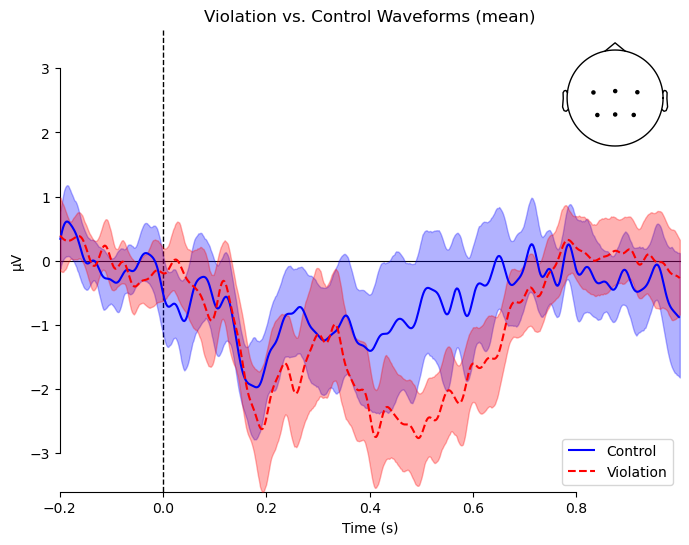

In [5]:
# Define plot parameters
roi = ['C3', 'Cz', 'C4', 
       'P3', 'Pz', 'P4']

# set custom line colors and styles
color_dict = {'Control':'blue', 'Violation':'red'}
linestyle_dict = {'Control':'-', 'Violation':'--'}

mne.viz.plot_compare_evokeds(evokeds,
                             combine='mean',
                             legend='lower right',
                             picks=roi, show_sensors='upper right',
                             colors=color_dict,
                             linestyles=linestyle_dict,
                             title='Violation vs. Control Waveforms'
                            )
plt.show()

## Differences

As we did in the single-participant analysis, we can also create difference waves to more easily visualize the difference between conditions, and compare it to zero (i.e., no difference between conditions). 

In order to get CIs that reflect the variance across participants, we need to compute the *Violation-Control* difference separately for each participant. As we did for a single participant's data, we use `mne.combine_evoked()` for this, with a weight of `1` for *Violation* and `-1` for *Control*. The only difference here is we put this function in a list comprehension to loop over participants. 

In [6]:
diff_waves = [mne.combine_evoked([evokeds['Violation'][subj], 
                                  evokeds['Control'][subj]
                                 ],
                                 weights=[1, -1]
                                 ) 
              for subj in range(len(data_files))
              ]
diff_waves

[<Evoked | 'Violation - Control' (average, N=20.0), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
 <Evoked | 'Violation - Control' (average, N=17.74647887323944), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
 <Evoked | 'Violation - Control' (average, N=18.986842105263158), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
 <Evoked | 'Violation - Control' (average, N=19.0), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
 <Evoked | 'Violation - Control' (average, N=19.9875), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
 <Evoked | 'Violation - Control' (average, N=16.5), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
 <Evoked | 'Violation - Control' (average, N=18.37837837837838), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
 <Evoked | 'Violation - Control' (average, N=19.487179487179485), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
 <Evoked | 'Violation - Control' (average, N=16.484848484848484), -0.19922 – 1 s, baseline off, 64 ch, ~388 kB>,
 <Evoked | 'Violation - Control' (aver

## Plot difference waveform

In making the difference waveform above, we simply created a list of `Evoked` objects. We didn't create a dictionary since there is only one contrast (*Violation-Control*), so no need to have informative dictionary keys for a set of different items (contrasts). This is fine, however MNE's `plot_compare_evokeds()` has some complicated behavior when it comes to its inputs, and whether it draws CIs or not. Specifically, the [API](https://mne.tools/stable/generated/mne.viz.plot_compare_evokeds.html) reads:

> If a list of Evokeds, the contents are plotted with their .comment attributes used as condition labels... If a dict whose values are Evoked objects, the contents are plotted as single time series each and the keys are used as labels. If a [dict/list] of lists, the unweighted mean is plotted as a time series and the parametric confidence interval is plotted as a shaded area.

In other words, when the function gets a *list* of `Evoked` objects as input, it will draw each object as a separate waveform, but if it gets a *dictionary* in which each entry is a list of `Evoked` objects, if will average them together and draw CIs. Since we desire the latter behavior here, in the command below we create a dictionary "on the fly" inside the plotting command, with a key corresponding to the label we want, and the value being the list of difference waves. 

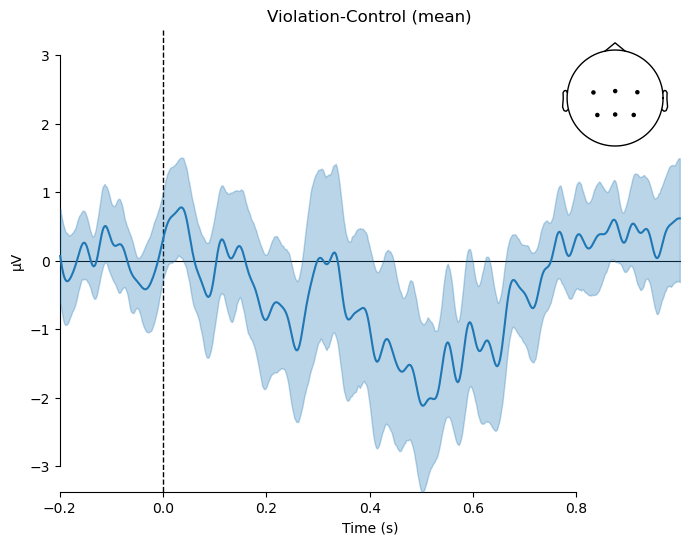

In [7]:
contrast = 'Violation-Control'
mne.viz.plot_compare_evokeds({contrast:diff_waves}, combine='mean',
                            legend=None,
                            picks=roi, show_sensors='upper right',
                            title=contrast
                            )
plt.show()

The nice thing about 95% CIs is that they provide an easy visual aid for interpreting the results. If the CI overlaps zero, then the difference between conditions is not statistically significant. If the CI does not overlap zero, then the difference can be considered statistically significant. In this case, the CI largely does not overlap zero between ~400–600 ms, so we can conclude that the difference between conditions is statistically significant in that time window.

## Scalp topographic map

As with `plot_compare_evoked()`, it's important to understand what type of data the `plot_evoked_topomap()` function needs in order to get it to work right. Whereas `plot_compare_evoked()` will average over a list of `Evoked` objects, `plot_evoked_topomap()` will only accept a single Evoked object as input. Therefore, in the command below we apply the `mne.grand_average()` function to the list of `Evoked` objects (**Grand averaging** is a term used in EEG research to refer to an average across participants; this terminology developed to distinguish such an average from an average across trials, for a single participant).

Here we plot the topographic map for the average amplitude over a 200 ms period, centered on 400 ms (i.e., 300–500 ms). 

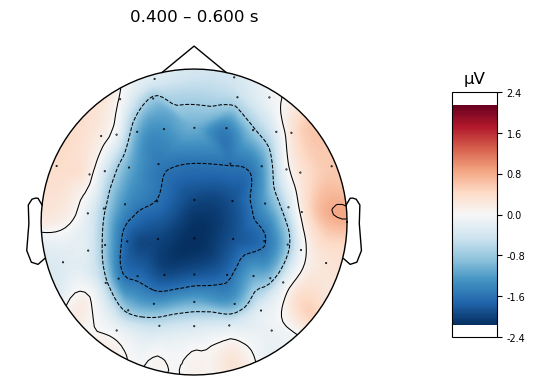

In [8]:
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            times=.500, average=0.200, 
                            size=3
                           )
plt.show()

We can add a few enhancements to the plot to make it more interpretable:
- The `show_names` kwarg tells the function to plot the names of each channel. We also use `sensors=False` otherwise the dots for each channel would overlap the names.
- The `contours=False` kwarg turns off the dashed contour lines you can see above. This is a matter of personal preference, however I feel that these are like non-continuous colour scales, in that they provide visual indicators of discontinuous "steps" in the scalp electrical potential values, when in fact these vary smoothly and continuously. 
- We increase the `size` to make the channel labels a bit easier to read (unfortunately the function doesn't provide a kwarg to adjust the font size of these).

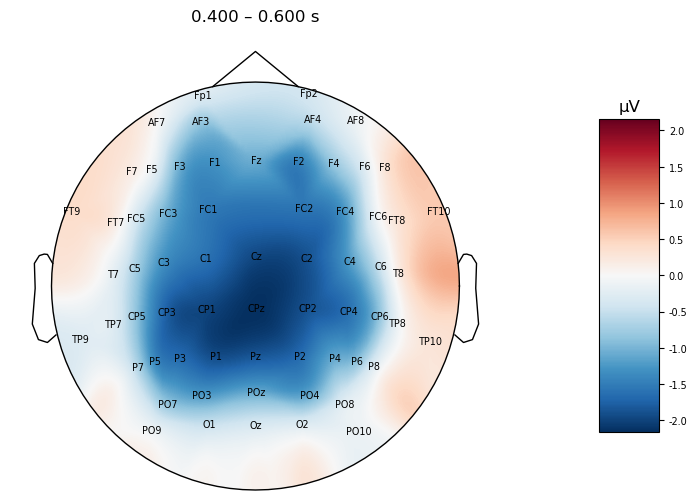

In [31]:
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            times=.500, average=0.200, 
                            show_names=True, sensors=False,
                            contours=False,
                            size=4
                           );

## Summary

In this lesson we learned how to load in a group of `Evoked` objects, and how to use MNE's `plot_compare_evokeds()` function to plot the average waveforms for each condition, and the 95% confidence intervals (CIs) for each. We also learned how to create difference waves, and plot the average difference wave with CIs. Finally, we learned how to plot a scalp topographic map of the average amplitude over a time window of interest. Of course, none of this tells us whether the Violation–Control difference is statistically significant. We will learn how to do that in the next lesson.